In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import pickle
import nltk
from nltk import *
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.metrics import f1_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
# from sklearn.neural_network import MLPClassifier
from time import time
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import randint as sp_randint
import xgboost as xgb
from xgboost import XGBClassifier
import scipy.sparse as sp
# from autosklearn.classification import AutoSklearnClassifier

# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

def pickle_file(filename, obj):
    with open('dumps/' + filename, 'wb') as f:
        pickle.dump(obj, f)


def unpickle_file(filename):
    with open('dumps/' + filename, 'rb') as f:
        return pickle.load(f)
    
def preprocess(text):
# Remove punctuation, stopword and then stemmering
    stop = set(stopwords.words("english"))
    stemmer = stem.PorterStemmer()
    punctuation = set(string.punctuation)

    doc = [stemmer.stem(word) for word in nltk.word_tokenize(text) if (word not in punctuation) and (word not in stop)]

    doc = ' '.join(w for w in doc)
    return doc

def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)
    

In [7]:
data_train = pd.read_csv('data_train.csv', encoding='utf-8')

data_train["Summary"] = data_train["Summary"].apply(preprocess)

summaries_train = data_train['Summary'].as_matrix()

ydf = data_train.drop('Summary', axis = 1)
ydf = ydf.drop(ydf.columns[0], axis = 1)
ydf = ydf.drop(ydf.columns[0], axis = 1)
ydf = ydf.as_matrix()

tfidfVect = TfidfVectorizer()
tfidf = tfidfVect.fit_transform(summaries_train)

pickle_file('tfidf.dat', tfidf)
pickle_file('tfidf_vocab.dat', tfidfVect.vocabulary_)
pickle_file('ydf.dat', ydf)



In [28]:
tfidf_vocab = TfidfVectorizer(decode_error="replace",vocabulary=unpickle_file('tfidf_vocab.dat'))
tfidf_train = unpickle_file('tfidf.dat')
ydf = unpickle_file('ydf.dat')
X_train = tfidf_train
y_train = ydf

In [38]:
def train_linear_svc(features_train, labels_train):
    print ("Training linear SVC")
    clf = SVC(C=1, class_weight='balanced')
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf


def train_randomForest(features_train, labels_train):
    print ("Training random forest")
    clf = RandomForestClassifier(n_estimators=70, max_depth=70)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_decisionTree(features_train, labels_train):
    print ("Training decision tree")
    clf = tree.DecisionTreeClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_adaboost_decision_tree(features_train, labels_train):
    print ("Training adaboost decision tree")
    clf = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=5),
                              n_estimators=600,
                              learning_rate=1)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_autosklearn(features_train, labels_train):
    print ("Training automl")
    clf = autosklearn.classification.AutoSklearnClassifier()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf


def train_SGD_l1(features_train, labels_train):
    print ("Training SGD l1")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l1", loss="log")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf
                        
def train_SGD_l2(features_train, labels_train):
    print ("Training SGD l2")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="l2")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_SGD_elasticnet(features_train, labels_train):
    print ("Training SGD elascticnet")
    clf = SGDClassifier(alpha=.0001, n_iter=50, penalty="elasticnet")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_PassiveAggressiveClassifier(features_train, labels_train):
    print ("Training PassiveAggressiveClassifier")
    clf = PassiveAggressiveClassifier(n_iter=50)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_RidgeClassifier(features_train, labels_train):
    print ("Training RidgeClassifier")
    clf = RidgeClassifier(tol=1e-2, solver="sag")
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_KNeighborsClassifier(features_train, labels_train):
    print ("Training KNeighborsClassifier")
    clf = KNeighborsClassifier(n_neighbors=10)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_MultinomialNB(features_train, labels_train):
    print ("Training MultinomialNB")
    clf = MultinomialNB(alpha=.01)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_BernoulliNB(features_train, labels_train):
    print ("Training BernoulliNB")
    clf = BernoulliNB(alpha=.01)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_MLP(features_train, labels_train):
    print ("Training MLP")
    clf = MLPClassifier(random_state=0, max_iter=400)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_NearestCentroid(features_train, labels_train):
    print ("Training NearestCentroid")
    clf = NearestCentroid()
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf

def train_xgboost(features_train, labels_train):
    print ("Training xgboost 2")
    clf = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
    #clf.fit(features_train, labels_train)
    clf = OneVsRestClassifier(clf).fit(features_train, labels_train)
    return clf
    
    
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

def grid_search_forest(X, y):
    clf = RandomForestClassifier(n_estimators=70)

    # Utility function to report best scores
 
    # use a full grid over all parameters
    param_grid = {"max_depth": [3, None],
                  "max_features": [1, 3, 10],
                  "min_samples_split": [2, 3, 4, 5, 10],
                  "min_samples_leaf": [1, 3, 10],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}

    # run grid search
    grid_search = GridSearchCV(clf, param_grid=param_grid)
    start = time()
    grid_search.fit(X, y)

    print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
          % (time() - start, len(grid_search.cv_results_['params'])))
    report(grid_search.cv_results_)

                        

In [30]:
data_test = pd.read_csv('data_test.csv', encoding='utf-8')

data_test["Summary"] = data_test["Summary"].apply(preprocess)

summaries_test = data_test['Summary'].as_matrix()

transformer = TfidfTransformer()
tfidf_test = transformer.fit_transform(tfidf_vocab.fit_transform(summaries_test))
pickle_file('tfidf_test.dat', tfidf_test)
# tfidf_test = unpickle_file('tfidf_test.dat')
X_test = tfidf_test


ydf_test = pd.read_csv('labels_test.csv', encoding='utf-8')
target_names = list(ydf_test.columns.values)
del target_names[0]
ydf_test = ydf_test.drop(ydf_test.columns[0], axis = 1)
ydf_test = ydf_test.as_matrix()
pickle_file('ydf_test.dat', ydf_test)
# ydf_test = unpickle_file('ydf_test.dat')

In [43]:
draw_roc_tab = []

def benchmark(clf, name):  
    t0 = time() 
    if name == 'xgboost':
        pred = clf.predict(sp.hstack((X_test, sp.csr_matrix(np.ones((X_test.shape[0],1))))))
    else:
        pred = clf.predict(X_test)
        pred_proba = clf.predict_proba(X_test)
    
    print(pred_proba)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    score_hamming = hamming_score(ydf_test, pred)    
    f1_micro = f1_score(ydf_test, pred, average="micro")
    f1_macro = f1_score(ydf_test, pred, average="macro")
    f1_weighted = f1_score(ydf_test, pred, average="weighted")
    f1_samples = f1_score(ydf_test, pred, average="samples")
    
    print('F1-Score with micro compute: {0}'.format(f1_micro))
    print('F1-Score with macro compute: {0}'.format(f1_macro))
    print('F1-Score with weighted compute: {0}'.format(f1_weighted))
    print('F1-Score with samples compute: {0}'.format(f1_samples))
    print('Hamming score: {0}'.format(score_hamming))
    print "\n"
    print classification_report(ydf_test, pred, target_names=target_names)
    
    draw_roc_tab.append((ydf_test, pred_proba, name))
    return name, score_hamming, f1_micro, f1_macro, f1_weighted, f1_samples



def draw_ROC(y_real_and_y_pedit_and_clf_name_list):
    """ y_test_and_y_score: une liste de y_test et y_score.
        [(y_test, y_score, name), (y_test, y_score, name),...]
        y_test est label réal
        y_score est label prédit 
        name est le nom de classification
       """
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc
    from scipy import interp
    # Plot all ROC curves
    plt.figure()
    for y_test, y_score, name in y_real_and_y_pedit_and_clf_name_list:
        n_classes = y_score.shape[1]
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        # Compute macro-average ROC curve and ROC area
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])
        # Finally average it and compute AUC
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.plot(fpr["micro"], tpr["micro"],
                 label = name + ' micro ROC (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),  linewidth=2)
        plt.plot(fpr["macro"], tpr["macro"],
                 label = name + ' macro ROC (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),  linewidth=2)

        #for i in range(n_classes):
        #    plt.plot(fpr[i], tpr[i], lw=2,
        #    label='ROC curve of {0} (area = {1:0.2f})'
        #             ''.format(data.columns.values[i+2], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-labels')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

results = []

In [ ]:
# print y_train.shape
# print ydf_test.shape
svm_classifier_linear = train_linear_svc(X_train, y_train)
pickle_file('svm_classifier_linear', svm_classifier_linear)
# svm_classifier_linear = unpickle_file('svm_classifier_linear')
results.append(benchmark(svm_classifier_linear, 'svm_classifier_linear'))

Training linear SVC


In [ ]:
# random_forest = train_randomForest(X_train, y_train)
# pickle_file('random_forest', random_forest)
random_forest = unpickle_file('random_forest')
results.append(benchmark(random_forest, 'random_forest'))

In [ ]:
# decision_tree = train_decisionTree(X_train, y_train)
# pickle_file('decision_tree', decision_tree)
decision_tree = unpickle_file('decision_tree')
results.append(benchmark(decision_tree, 'decision_tree'))

In [ ]:
adaboost_decision_tree = train_adaboost_decision_tree(X_train, y_train)
pickle_file('adaboost_decision_tree', adaboost_decision_tree)
# adaboost_decision_tree = unpickle_file('adaboost_decision_tree')
results.append(benchmark(adaboost_decision_tree, 'adaboost_decision_tree'))

Training adaboost decision tree


In [46]:
# import os

# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.1.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

xgboost = train_xgboost(X_train, y_train)
pickle_file('xgboost', xgboost)
# xgboost = unpickle_file('xgboost')
results.append(benchmark(xgboost, 'xgboost'))

Training xgboost 2
test time:  39.974s
F1-Score with micro compute: 0.549014860325
F1-Score with macro compute: 0.442679972579
F1-Score with weighted compute: 0.519570839292
F1-Score with samples compute: 0.523017003186
Hamming score: 0.449018627919


                 precision    recall  f1-score   support

          drama       0.75      0.79      0.77     11088
         action       0.68      0.39      0.50      3786
      adventure       0.65      0.34      0.45      3435
      animation       0.68      0.53      0.60      1376
          crime       0.68      0.37      0.48      2825
        fantasy       0.56      0.21      0.31      1227
          music       0.58      0.16      0.25      1519
        musical       0.57      0.13      0.21      1374
        mystery       0.49      0.16      0.25      1171
        romance       0.65      0.24      0.35      3759
science fiction       0.79      0.45      0.57      1313
          sport       0.68      0.30      0.42       359
      

In [44]:
# SGD_l1 = train_SGD_l1(X_train, y_train)
# pickle_file('SGD_l1.dat', SGD_l1)
SGD_l1 = unpickle_file('SGD_l1.dat')
results.append(benchmark(SGD_l1, 'SGD_l1'))

[[ 0.11104145  0.33782675  0.3030044  ...,  0.0325329   0.01839203
   0.12585198]
 [ 0.54131232  0.1295393   0.15963866 ...,  0.01645124  0.01960662
   0.12226238]
 [ 0.52412449  0.20283974  0.21365452 ...,  0.02524577  0.01725769
   0.07891356]
 ..., 
 [ 0.58578024  0.1861749   0.16488144 ...,  0.04814553  0.01755323
   0.08049647]
 [ 0.59693636  0.11417308  0.11634154 ...,  0.02067821  0.01713114
   0.07711359]
 [ 0.58442062  0.16703999  0.14997462 ...,  0.01768767  0.01768616
   0.07956076]]
test time:  0.277s
F1-Score with micro compute: 0.414629383045
F1-Score with macro compute: 0.196583794685
F1-Score with weighted compute: 0.319989324294
F1-Score with samples compute: 0.419063833224
Hamming score: 0.363333059832


                 precision    recall  f1-score   support

          drama       0.73      0.83      0.77     11088
         action       0.73      0.10      0.17      3786
      adventure       0.71      0.06      0.10      3435
      animation       0.86      0.27   

In [ ]:
SGD_l2 = train_SGD_l2(X_train, y_train)
pickle_file('SGD_l2', SGD_l2)
# SGD_l2 = unpickle_file('SGD_l2')
results.append(benchmark(SGD_l2, 'SGD_l2'))

In [ ]:
SGD_elasticnet = train_SGD_elasticnet(X_train, y_train)
pickle_file('SGD_elasticnet', SGD_elasticnet)
# SGD_elasticnet = unpickle_file('SGD_elasticnet')
results.append(benchmark(SGD_elasticnet, 'SGD_elasticnet'))

In [11]:
PassiveAggressiveClassifier = train_PassiveAggressiveClassifier(X_train, y_train)
pickle_file('PassiveAggressiveClassifier', PassiveAggressiveClassifier)
# PassiveAggressiveClassifier = unpickle_file('PassiveAggressiveClassifier')
results.append(benchmark(PassiveAggressiveClassifier, 'PassiveAggressiveClassifier'))

Training PassiveAggressiveClassifier


AttributeError: 'PassiveAggressiveClassifier' object has no attribute 'predict_proba'

In [12]:
RidgeClassifier = train_RidgeClassifier(X_train, y_train)
pickle_file('RidgeClassifier', RidgeClassifier)
# RidgeClassifier = unpickle_file('RidgeClassifier')
results.append(benchmark(RidgeClassifier, 'RidgeClassifier'))

Training RidgeClassifier


AttributeError: 'RidgeClassifier' object has no attribute 'predict_proba'

In [ ]:
# KNeighborsClassifier = train_KNeighborsClassifier(X_train, y_train)
# pickle_file('KNeighborsClassifier', KNeighborsClassifier)
KNeighborsClassifier = unpickle_file('KNeighborsClassifier')
results.append(benchmark(KNeighborsClassifier, 'KNeighborsClassifier'))

In [45]:
# MultinomialNB = train_MultinomialNB(X_train, y_train)
# pickle_file('MultinomialNB', MultinomialNB)
MultinomialNB = unpickle_file('MultinomialNB')
results.append(benchmark(MultinomialNB, 'MultinomialNB'))

[[  1.07597827e-01   3.98093101e-01   9.24106312e-01 ...,   8.85331631e-04
    4.33980405e-04   6.52531507e-02]
 [  6.32024215e-01   1.19448583e-01   1.26978206e-01 ...,   3.02235315e-04
    4.55564480e-04   2.26947968e-02]
 [  8.34216086e-01   8.31552011e-02   1.03171757e-01 ...,   1.07404511e-02
    3.42052094e-03   2.00396273e-03]
 ..., 
 [  9.75788769e-01   1.73436374e-02   1.87422447e-02 ...,   1.28103090e-02
    4.59826426e-03   8.67955229e-03]
 [  9.54455119e-01   6.19150877e-03   2.37135813e-02 ...,   8.72084291e-04
    6.16589938e-03   1.84750477e-02]
 [  9.87105535e-01   2.09630128e-02   1.51678948e-02 ...,   1.52911023e-02
    2.02303902e-03   1.03606373e-02]]
test time:  0.623s
F1-Score with micro compute: 0.491204474943
F1-Score with macro compute: 0.3596302038
F1-Score with weighted compute: 0.451709673349
F1-Score with samples compute: 0.474200769932
Hamming score: 0.40447847877


                 precision    recall  f1-score   support

          drama       0.71      0

In [46]:
# BernoulliNB = train_BernoulliNB(X_train, y_train)
# pickle_file('BernoulliNB', BernoulliNB)
BernoulliNB = unpickle_file('BernoulliNB')
results.append(benchmark(BernoulliNB, 'BernoulliNB'))

[[  3.86660994e-20   9.99920246e-01   1.00000000e+00 ...,   2.04369513e-22
    4.77128365e-30   1.64432924e-02]
 [  9.99981864e-01   5.51171583e-01   5.45004450e-01 ...,   9.77857953e-36
    3.48827825e-52   5.69480238e-12]
 [  7.98583837e-01   9.99996949e-01   1.00000000e+00 ...,   1.10094613e-12
    2.67542778e-44   2.63858322e-20]
 ..., 
 [  1.00000000e+00   2.12979894e-14   4.44828655e-09 ...,   1.40954583e-06
    7.02433324e-35   1.77630528e-17]
 [  9.99999999e-01   3.16536590e-20   4.94641203e-21 ...,   2.60674404e-25
    7.38458480e-17   6.25538063e-13]
 [  1.00000000e+00   4.69615831e-13   1.42412442e-16 ...,   4.81271684e-18
    1.00367116e-22   1.20884549e-15]]
test time:  1.587s
F1-Score with micro compute: 0.560657617114
F1-Score with macro compute: 0.473421708913
F1-Score with weighted compute: 0.553767874972
F1-Score with samples compute: 0.534866890686
Hamming score: 0.444961802504


                 precision    recall  f1-score   support

          drama       0.72    

In [ ]:
# MLP = train_MLP(X_train, y_train)
# pickle_file('MLP', MLP)
MLP = unpickle_file('MLP')
results.append(benchmark(MLP, 'MLP'))

In [22]:
automl = train_autosklearn(X_train, y_train)
results.append(benchmark(automl, 'automl'))

Training automl


NameError: global name 'autosklearn' is not defined

In [ ]:
draw_roc_tab

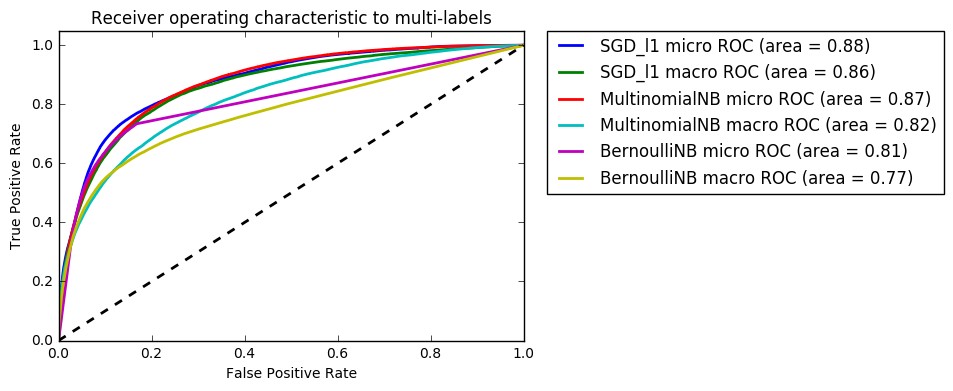

In [49]:
draw_ROC(draw_roc_tab)

In [62]:
from sklearn.utils import resample
from sklearn.metrics import f1_score
score = []
for i in range(500):
    X_sub_test, y_sub_test = resample(X_test, ydf_test,replace=True)
    y_pred = SGD_l1.predict(X_sub_test)
    f1_weighted = f1_score(y_sub_test, y_pred, average = "weighted")
    print(f1_weighted)
    score.append(f1_weighted)
print np.std(score)



0.31754909556
0.318072588642
0.325606857084
0.31301688631
0.322653305604
0.320088513428
0.321416318647
0.324066231232
0.315758610141
0.321298985032
0.317424304964
0.317616290808
0.324494897411
0.322530047958
0.320140405752
0.325484687
0.31866976213
0.319784437345
0.322489127617
0.3235938071
0.318947524191
0.318197465862
0.322098192442
0.313447643971
0.319499221756
0.318858689
0.319567621813


KeyboardInterrupt: 

TypeError: cannot perform reduce with flexible type

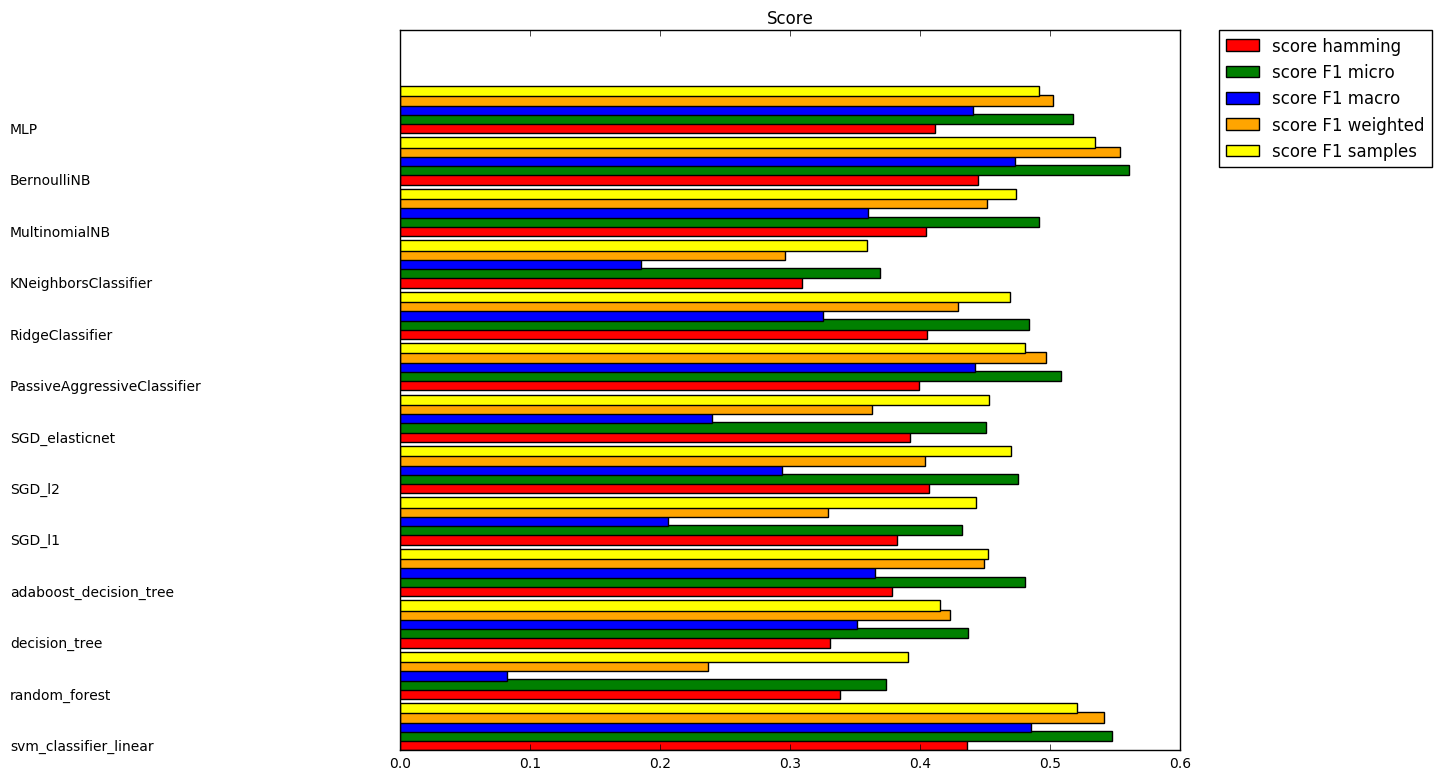

In [55]:
%matplotlib inline

indices = np.arange(len(results))

results_final = [[x[i] for x in results] for i in range(6)]
width = 0.18  
clf_names, score_hamming,f1_micro, f1_macro, f1_weighted, f1_samples = results_final
# test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score_hamming, .2, label="score hamming", color='red')
plt.barh(indices + width, f1_micro, .2, label="score F1 micro", color='green')
plt.barh(indices + 2*width, f1_macro, .2, label="score F1 macro", color='blue')
plt.barh(indices + 3*width, f1_weighted, .2, label="score F1 weighted", color='orange')
plt.barh(indices + 4*width, f1_samples, .2, label="score F1 samples", color='yellow')
# plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()